# Federated Learning (FL) - Titanic

## Objective
Train an ML model of your choice to predict the survival probability in a federated setup and benchmark it against a model being trained on the full dataset.


## Import packages

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from pathlib import Path

In [145]:
# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

# add module path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from src import config
from src import client
from src import data
from src import preprocess
from src import model
from src import server
from src import stats
from src import visual
from src import utils

In [147]:
from sklearn.linear_model import SGDClassifier

In [212]:
server_titanic = config.ServerTitanic()
server_titanic

All algorithms are distributed to clients successfully


In [213]:
server_titanic.fit_classifier()

In [215]:
# df_score_dict =server_titanic.collab.merge_collab_scores(output_df=True)
score_dict =server_titanic.collab.merge_collab_scores(output_df=False)

# score_dict = server_titanic.collab.scores_
# df_score_dict = pd.json_normalize(score_dict).apply(pd.Series.explode).reset_index(drop=True)


In [216]:
del score_dict['A']['global']
del score_dict['B']['global']

In [217]:
len(score_dict2['B'])

500

In [208]:
score_dict2 = {'A': score_dict['A']['local'], 'B': score_dict['B']['local']}
df_score_dict = pd.DataFrame().from_dict(score_dict2)
df_score_dict.head()


,A,B
0,0.806452,0.760684
1,0.693548,0.769231
2,0.758065,0.760684
3,0.774194,0.752137
4,0.725806,0.777778


In [218]:
df_score_dict = pd.json_normalize(score_dict).apply(pd.Series.explode).reset_index(drop=True)
df_score_dict.head()

,A.local,B.local
0,0.629032,0.786325
1,0.725806,0.820513
2,0.709677,0.803419
3,0.725806,0.803419
4,0.725806,0.786325


In [ ]:
df_score_dict.shape

<AxesSubplot:>

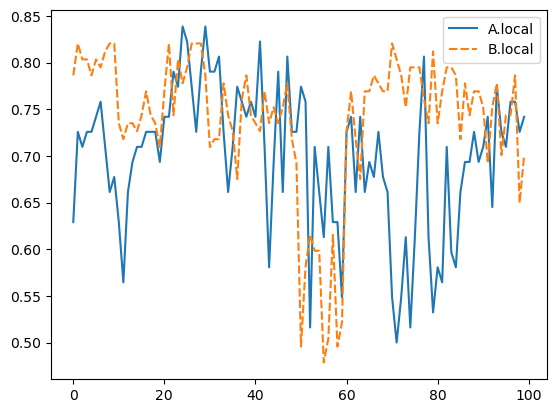

In [219]:
sns.lineplot(df_score_dict)

In [152]:
server_titanic.collab.classifier_aggregator.weights

array([0.34269663, 0.65730337])

In [158]:
server_titanic.collab.clients[1].statistics['count_records'].results_

468

<AxesSubplot:>

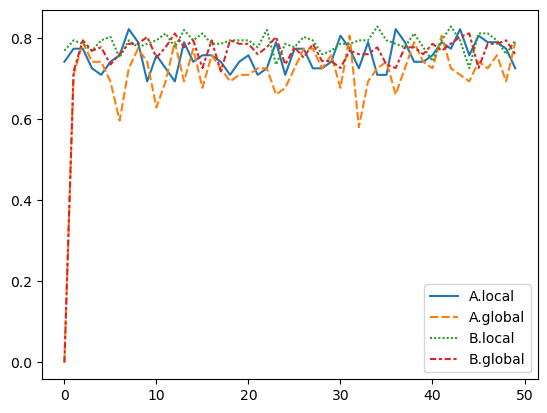

In [90]:
server_titanic.collab
sns.lineplot(df_score_dict)

In [95]:
client_a = config.ClientA()
client_b = config.ClientB()

client_a._run_transformers()

AttributeError: 'NoneType' object has no attribute 'fit_transform'

In [105]:
X_train = pd.concat([X_train_a, X_train_b])
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
1,220,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
2,229,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
3,169,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
4,408,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
239,673,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
240,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
241,713,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
242,345,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S


In [162]:
X_train_a.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
1,220,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
2,229,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
3,169,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
4,408,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S


In [163]:
# load data files of each party
data_a = config.DataA()
X_train_a, y_train_a = data_a.load_train_data(split_xy=True)
X_test_a, y_test_a = data_a.load_test_data(split_xy=True)


data_b = config.DataB()
X_train_b, y_train_b = data_b.load_train_data(split_xy=True)
X_test_b, y_test_b = data_b.load_test_data(split_xy=True)

# join data files
X_train = pd.concat([X_train_a, X_train_b])
X_test = pd.concat([X_test_a, X_test_b])
y_train = pd.concat([y_train_a, y_train_b])
y_test = pd.concat([y_test_a, y_test_b])

# load transformer pipeline and classifier 
pipeline = model.get_standard_transformer_pipeline('auto')

# transform datasets - note Pipeline deos not support partial fit

classifier = model.get_standard_classifier(random_state=config.RANDOM_STATE)

# merge classifier to pipeline
pipeline.steps.append(('clf', classifier))

pipeline

Pipeline(steps=[('preprocess', GenericPreprocessor(categories='auto')),
                ('scale', RobustScaler()),
                ('clf',
                 BatchSGD(batch_size=20, loss='log_loss',
                          n_local_iterations=100, random_state=42))])

In [166]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess', GenericPreprocessor(categories='auto')),
                ('scale', RobustScaler()),
                ('clf',
                 BatchSGD(batch_size=20, loss='log_loss',
                          n_local_iterations=100, random_state=42))])

In [167]:
pipeline.score(X_test, y_test)

0.7541899441340782

In [ ]:
model.get_standard_classifier(random_state=config.RANDOM_STATE)

<AxesSubplot:>

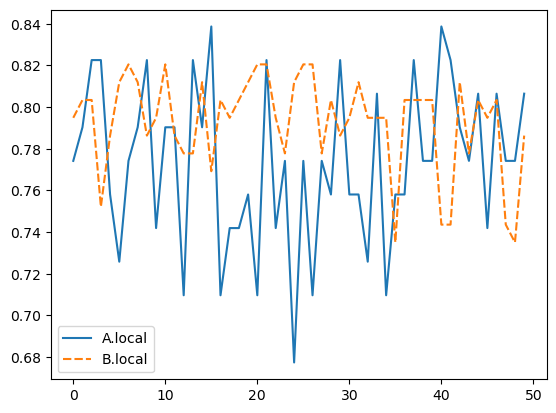

In [74]:
server_titanic.collab
sns.lineplot(df_score_dict[['A.local', 'B.local']])

In [62]:
server_titanic.collab.merge_collab_scores()
server_titanic.collab.scores_

{'A': {'local': [0.7741935483870968,
   0.7903225806451613,
   0.8225806451612904,
   0.8225806451612904,
   0.7580645161290323,
   0.7258064516129032,
   0.7741935483870968,
   0.7903225806451613,
   0.8225806451612904,
   0.7419354838709677,
   0.7903225806451613,
   0.7903225806451613,
   0.7096774193548387,
   0.8225806451612904,
   0.7903225806451613,
   0.8387096774193549,
   0.7096774193548387,
   0.7419354838709677,
   0.7419354838709677,
   0.7580645161290323,
   0.7096774193548387,
   0.8225806451612904,
   0.7419354838709677,
   0.7741935483870968,
   0.6774193548387096,
   0.7741935483870968,
   0.7096774193548387,
   0.7741935483870968,
   0.7580645161290323,
   0.8225806451612904,
   0.7580645161290323,
   0.7580645161290323,
   0.7258064516129032,
   0.8064516129032258,
   0.7096774193548387,
   0.7580645161290323,
   0.7580645161290323,
   0.8225806451612904,
   0.7741935483870968,
   0.7741935483870968,
   0.8387096774193549,
   0.8225806451612904,
   0.790322580645161

In [248]:
server_titanic.collab.merge_collab_scores()
server_titanic.collab.scores_

{'A': {'local': [0.6774193548387096,
   0.8387096774193549,
   0.8225806451612904,
   0.8225806451612904,
   0.8064516129032258,
   0.7903225806451613,
   0.7903225806451613,
   0.7741935483870968,
   0.7580645161290323,
   0.7580645161290323],
  'global': [0,
   0.6612903225806451,
   0.7419354838709677,
   0.7419354838709677,
   0.7419354838709677,
   0.7903225806451613,
   0.7741935483870968,
   0.7258064516129032,
   0.7419354838709677,
   0.7741935483870968]},
 'B': {'local': [0.8034188034188035,
   0.8034188034188035,
   0.7948717948717948,
   0.7863247863247863,
   0.7777777777777778,
   0.7863247863247863,
   0.7948717948717948,
   0.811965811965812,
   0.7692307692307693,
   0.7948717948717948],
  'global': [0,
   0.7863247863247863,
   0.7863247863247863,
   0.7863247863247863,
   0.7692307692307693,
   0.7521367521367521,
   0.7863247863247863,
   0.7863247863247863,
   0.7606837606837606,
   0.7606837606837606]}}

In [243]:
server_titanic.collab.clients[0].local_scores_

[0.6774193548387096,
 0.8387096774193549,
 0.8225806451612904,
 0.8225806451612904,
 0.8064516129032258,
 0.7903225806451613,
 0.7903225806451613,
 0.7741935483870968,
 0.7580645161290323,
 0.7580645161290323]

In [235]:
server_titanic.collab.clients[0].global_scores_

[0,
 0.7258064516129032,
 0.7419354838709677,
 0.7741935483870968,
 0.7419354838709677,
 0.7258064516129032,
 0.7580645161290323,
 0.7580645161290323,
 0.7580645161290323,
 0.7096774193548387]

In [157]:
X_train, X_test, y_train, y_test = server_titanic._run_transformers(server_titanic.collab.clients[0])

In [158]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [188]:
np.array([c for c in [[0,1],[0,1]]]).flat()

TypeError: 'numpy.flatiter' object is not callable

In [147]:
server_titanic.collab.clients[0].clf_local

SGDClassifier(loss='log_loss', random_state=42, warm_start=True)

In [198]:
server_titanic.collab.classifier.classes_

[0, 1]

In [202]:
server_titanic.global_scores_

{'A': [0,
  0.7258064516129032,
  0.7419354838709677,
  0.7741935483870968,
  0.7419354838709677,
  0.7258064516129032,
  0.7580645161290323,
  0.7580645161290323,
  0.7580645161290323,
  0.7096774193548387],
 'B': [0,
  0.717948717948718,
  0.7008547008547008,
  0.7435897435897436,
  0.7094017094017094,
  0.7094017094017094,
  0.6923076923076923,
  0.7606837606837606,
  0.7948717948717948,
  0.7692307692307693]}

In [142]:
server_titanic.collab.classifier.classes_

AttributeError: 'SGDClassifier' object has no attribute 'classes_'

In [133]:
server_titanic.local_scores_

{'A': [0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032,
  0.7258064516129032],
 'B': [0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863,
  0.7863247863247863]}

In [88]:
local_results = server_titanic.collab.statistics['nominal_categories'].local_results_
local_results.values()

TypeError: 'dict_values' object is not subscriptable

In [73]:
server_titanic.collab.statistics['count_records'].global_results_

712

In [70]:
np.sum(list(server_titanic.collab.statistics['count_records'].local_results_.values()))

712

In [37]:
[] + nc.results_['A'] + nc.results_['B']

[[],
 [],
 [],
 [],
 ['female', 'male'],
 [],
 [],
 [],
 [],
 [],
 ['A10',
  'A14',
  'A19',
  'A20',
  'A23',
  'A24',
  'A26',
  'A31',
  'A32',
  'A5',
  'A6',
  'A7',
  'B101',
  'B102',
  'B19',
  'B22',
  'B30',
  'B37',
  'B41',
  'B49',
  'B51 B53 B55',
  'B82 B84',
  'B86',
  'B96 B98',
  'C104',
  'C106',
  'C110',
  'C111',
  'C118',
  'C123',
  'C124',
  'C126',
  'C128',
  'C148',
  'C22 C26',
  'C23 C25 C27',
  'C30',
  'C46',
  'C47',
  'C52',
  'C68',
  'C70',
  'C78',
  'C82',
  'C83',
  'C86',
  'C87',
  'C91',
  'C93',
  'C95',
  'D',
  'D10 D12',
  'D19',
  'D26',
  'D33',
  'D35',
  'D46',
  'D48',
  'D50',
  'D56',
  'D6',
  'E101',
  'E12',
  'E17',
  'E24',
  'E25',
  'E46',
  'E50',
  'E58',
  'E63',
  'E67',
  'E77',
  'E8',
  'F2',
  'F33',
  'F4',
  'T'],
 ['C', 'Q', 'S'],
 [],
 [],
 [],
 [],
 ['female', 'male'],
 [],
 [],
 [],
 [],
 [],
 ['A16',
  'B18',
  'B20',
  'B22',
  'B28',
  'B3',
  'B35',
  'B39',
  'B4',
  'B42',
  'B49',
  'B5',
  'B57 B59 B63 B6

In [34]:
combined_list = []
for nested_list in nc.results_.values():
    for inner_list in nested_list:
        combined_list.append(nested_list)

combined_list

[[[],
  [],
  [],
  [],
  ['female', 'male'],
  [],
  [],
  [],
  [],
  [],
  ['A10',
   'A14',
   'A19',
   'A20',
   'A23',
   'A24',
   'A26',
   'A31',
   'A32',
   'A5',
   'A6',
   'A7',
   'B101',
   'B102',
   'B19',
   'B22',
   'B30',
   'B37',
   'B41',
   'B49',
   'B51 B53 B55',
   'B82 B84',
   'B86',
   'B96 B98',
   'C104',
   'C106',
   'C110',
   'C111',
   'C118',
   'C123',
   'C124',
   'C126',
   'C128',
   'C148',
   'C22 C26',
   'C23 C25 C27',
   'C30',
   'C46',
   'C47',
   'C52',
   'C68',
   'C70',
   'C78',
   'C82',
   'C83',
   'C86',
   'C87',
   'C91',
   'C93',
   'C95',
   'D',
   'D10 D12',
   'D19',
   'D26',
   'D33',
   'D35',
   'D46',
   'D48',
   'D50',
   'D56',
   'D6',
   'E101',
   'E12',
   'E17',
   'E24',
   'E25',
   'E46',
   'E50',
   'E58',
   'E63',
   'E67',
   'E77',
   'E8',
   'F2',
   'F33',
   'F4',
   'T'],
  ['C', 'Q', 'S']],
 [[],
  [],
  [],
  [],
  ['female', 'male'],
  [],
  [],
  [],
  [],
  [],
  ['A16',
   'B18',
   

In [23]:
d = {}
for k, v in nc.results_.items():
    d.setdefault(k, []).append(v)
d

{'A': [[[],
   [],
   [],
   [],
   ['female', 'male'],
   [],
   [],
   [],
   [],
   [],
   ['A10',
    'A14',
    'A19',
    'A20',
    'A23',
    'A24',
    'A26',
    'A31',
    'A32',
    'A5',
    'A6',
    'A7',
    'B101',
    'B102',
    'B19',
    'B22',
    'B30',
    'B37',
    'B41',
    'B49',
    'B51 B53 B55',
    'B82 B84',
    'B86',
    'B96 B98',
    'C104',
    'C106',
    'C110',
    'C111',
    'C118',
    'C123',
    'C124',
    'C126',
    'C128',
    'C148',
    'C22 C26',
    'C23 C25 C27',
    'C30',
    'C46',
    'C47',
    'C52',
    'C68',
    'C70',
    'C78',
    'C82',
    'C83',
    'C86',
    'C87',
    'C91',
    'C93',
    'C95',
    'D',
    'D10 D12',
    'D19',
    'D26',
    'D33',
    'D35',
    'D46',
    'D48',
    'D50',
    'D56',
    'D6',
    'E101',
    'E12',
    'E17',
    'E24',
    'E25',
    'E46',
    'E50',
    'E58',
    'E63',
    'E67',
    'E77',
    'E8',
    'F2',
    'F33',
    'F4',
    'T'],
   ['C', 'Q', 'S']]],
 'B':

In [251]:
server_titanic = server.ServerTitanic()
server_titanic

In [ ]:
server_titanic.collab.statistics

{'n_records': <function src.utils.count_n_records(df)>,
 'nominal_categories': <function src.utils.get_categories(df, categorical_columns=['Sex', 'Cabin', 'Embarked'])>}

In [242]:
server_titanic.run_statistics()

In [255]:
server_titanic.fit_classifier()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\dkn1904.51564\Miniconda3\envs\fl_titanic\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dkn1904.51564\AppData\Local\Temp\ipykernel_15992\212492611.py", line 1, in <module>
    server_titanic.fit_classifier()
  File "C:\projects\side_projects\fl_titanic\src\server.py", line 37, in fit_classifier
    X_train, X_test, y_train, y_test = self.run_transformers(client_instance=client_instance)
  File "C:\projects\side_projects\fl_titanic\src\server.py", line 67, in run_transformers
    self.collab.transformers.named_steps['preprocess'].categories = self.stat_results_['nominal_categories']
KeyError: 'nominal_categories'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\dkn1904.51564\Miniconda3\envs\fl_titanic\lib\site-packages\IPython\core\interactiveshell.py", line 2052, i

In [256]:
server_titanic.stat_results_['

{'A': {'n_records': 244,
  'nominal_categories': [[],
   [],
   [],
   [],
   ['female', 'male'],
   [],
   [],
   [],
   [],
   [],
   ['A10',
    'A14',
    'A19',
    'A20',
    'A23',
    'A24',
    'A26',
    'A31',
    'A32',
    'A5',
    'A6',
    'A7',
    'B101',
    'B102',
    'B19',
    'B22',
    'B30',
    'B37',
    'B41',
    'B49',
    'B51 B53 B55',
    'B82 B84',
    'B86',
    'B96 B98',
    'C104',
    'C106',
    'C110',
    'C111',
    'C118',
    'C123',
    'C124',
    'C126',
    'C128',
    'C148',
    'C22 C26',
    'C23 C25 C27',
    'C30',
    'C46',
    'C47',
    'C52',
    'C68',
    'C70',
    'C78',
    'C82',
    'C83',
    'C86',
    'C87',
    'C91',
    'C93',
    'C95',
    'D',
    'D10 D12',
    'D19',
    'D26',
    'D33',
    'D35',
    'D46',
    'D48',
    'D50',
    'D56',
    'D6',
    'E101',
    'E12',
    'E17',
    'E24',
    'E25',
    'E46',
    'E50',
    'E58',
    'E63',
    'E67',
    'E77',
    'E8',
    'F2',
    'F33',
    '

In [240]:
server_titanic.collab.clients[0].data_object.load_train_data(split_xy=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
1,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
2,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
3,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
4,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
239,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
240,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
241,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
242,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S


In [206]:
sgd2.score(X_train, y_train)

NotFittedError: This SGDClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [201]:
t = [utils.get_categories]

In [204]:
t[0](df, config.FEATURES_NOMINAL)

[['female', 'male'],
 ['A10',
  'A20',
  'A23',
  'A24',
  'A26',
  'A31',
  'A34',
  'A36',
  'A5',
  'A6',
  'A7',
  'B101',
  'B19',
  'B20',
  'B22',
  'B30',
  'B37',
  'B38',
  'B41',
  'B49',
  'B50',
  'B51 B53 B55',
  'B58 B60',
  'B71',
  'B82 B84',
  'B86',
  'B94',
  'B96 B98',
  'C104',
  'C110',
  'C111',
  'C118',
  'C123',
  'C124',
  'C126',
  'C148',
  'C2',
  'C22 C26',
  'C23 C25 C27',
  'C30',
  'C46',
  'C52',
  'C65',
  'C68',
  'C70',
  'C78',
  'C82',
  'C83',
  'C86',
  'C87',
  'C91',
  'C92',
  'C93',
  'D',
  'D10 D12',
  'D19',
  'D26',
  'D30',
  'D33',
  'D35',
  'D46',
  'D48',
  'D49',
  'D50',
  'D56',
  'D6',
  'E101',
  'E12',
  'E17',
  'E24',
  'E25',
  'E31',
  'E38',
  'E44',
  'E46',
  'E50',
  'E58',
  'E63',
  'E67',
  'E77',
  'E8',
  'F2',
  'F33',
  'F4',
  'T'],
 ['C', 'Q', 'S']]

In [195]:
client_a = client.ClientA()
client_a.data.load_raw_data()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
2,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
3,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
4,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
301,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
302,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
303,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
304,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


## Load data
Observe:
- df_b has a pred column, df_a and df_test do not
- check if formatting is equivalent:
   - ticket naming format differs per dataset
   - age has unrealistic values - babies? Check if they have parents
- feature extraction


In [ ]:
# preprocess.create_train_test_data(test_size=0.2)

In [172]:
df_train_a, df_train_b = preprocess.load_train_data()
df_test_a, df_test_b = preprocess.load_test_data()

In [174]:
X_train_a, y_train_a = preprocess.split_x_y(df_train_a)
X_train_b, y_train_b = preprocess.split_x_y(df_train_b)
X_test_a, y_test_a = preprocess.split_x_y(df_test_a)
X_test_b, y_test_b = preprocess.split_x_y(df_test_b)

First all clients need to communicate all categories they have in each of their nominal features to ensure that these can be taken into account during one-hot-encoding.

In [167]:
categories_a = get_categories(df_a, config.FEATURES_NOMINAL)
categories_b = get_categories(df_b, config.FEATURES_NOMINAL)
categories_global = categories_a + categories_b

In [185]:
n_iter_avg = 100
n_iter_local = 50
batch_size = 50

clients = {
    'A': {'train_data': df_train_a, 'test_data': df_test_a},
    'B': {'train_data': df_train_b, 'test_data': df_test_b}
} 
train_datasets = [df_train_a, df_train_b]
test_datasets = [df_test_a, df_test_b]

pipeline = model.get_standard_pipeline(categories=categories_global)

scores = {}

clf_local = {}
for iter_avg in range(n_iter_avg):
    
    # train local models at each client
    for client_name, datasets in clients.items():
        X_train, y_train = preprocess.split_x_y(datasets['train_data'])
        X_test, y_test = preprocess.split_x_y(datasets['test_data'])

        cu = client.ClientUpdate(pipeline, n_epochs=n_iter_local, batch_size=batch_size)
        cu.fit(X_train, y_train)

        clf_local[client_name] = cu.clf
        
        # store score after updating models
        clf_local[client_name].score(X_test, y_test)
        
    clf_global = server.FedAvg(clf_local)
    

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\dkn1904.51564\Miniconda3\envs\fl_titanic\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dkn1904.51564\AppData\Local\Temp\ipykernel_15992\3875952147.py", line 25, in <module>
    cu.fit(X_train, y_train)
  File "C:\projects\side_projects\fl_titanic\src\client.py", line 40, in fit
    X = self._apply_transformers(X, y)
  File "C:\projects\side_projects\fl_titanic\src\client.py", line 76, in _apply_transformers
    if check_is_fitted(transformers):
  File "C:\Users\dkn1904.51564\Miniconda3\envs\fl_titanic\lib\site-packages\sklearn\utils\validation.py", line 1345, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

During handling of the above exception, another ex

## Train model

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [8]:
FEATURES_NUMERIC = ['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']

In [16]:
df_a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
2,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
3,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
4,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [105]:
df = df_a.dropna()
y = df['Survived']
X = df.drop(columns='Survived')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=config.RANDOM_STATE)


In [132]:
gp = preprocess.GenericPreprocessor()
gp.fit_transform(X_train, y_train)

array([[  0.    ,   1.    ,   0.    , ...,   0.    ,  18.    , 108.9   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,  35.    ,  26.2875],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,  35.    , 512.3292],
       ...,
       [  0.    ,   1.    ,   0.    , ...,   0.    ,  26.    ,  30.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,  19.    ,  53.1   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,  31.    ,  50.4958]])

In [122]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
170,506,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
244,702,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
261,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
29,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
5,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [153]:
clf = model.get_standard_pipeline()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.65

In [154]:
clf.named_steps['clf'].coef_

array([[ 5.31407398e+00, -5.31407398e+00, -1.35531728e+01,
         1.28641641e+01,  3.43135748e+01, -1.46468982e+01,
         8.69890283e+00, -8.81250752e+00, -4.41897080e+00,
         2.17473828e+01, -1.74697292e+00,  1.75036483e+00,
        -4.31293240e+00, -6.90180620e-05, -1.89721644e+00,
        -8.14680372e+00,  8.82777754e+00,  9.35007179e+00,
        -2.65009743e+01, -1.22795821e+01, -1.73529973e+01,
         2.65620525e+01,  1.33630777e+01, -8.81171359e+00,
        -4.42871520e+00,  8.72647141e+00,  8.05220348e+00,
        -1.38790190e+01,  1.76797289e+01, -1.78248032e+01,
        -2.26247946e-01, -1.32240562e+01, -1.77293144e+01,
         1.44312084e+01, -8.84508996e+00, -1.60579272e+01,
        -7.19561126e+00, -6.63064147e+00, -4.27955166e+00,
         8.24460796e+00,  5.38402241e+00,  1.15717946e+01,
         8.95027169e+00, -1.42519300e+01, -1.38799327e+01,
         1.76593477e+01,  1.81164620e+01, -4.50431715e+00,
        -4.41891304e+00,  8.83033316e+00,  8.83781826e+0

In [155]:
cu = client.ClientUpdate(clf, n_epochs=1000, batch_size=50)
cu.fit(X_train, y_train)

ClientUpdate(batch_size=50,
             clf=Pipeline(steps=[('preprocess', GenericPreprocessor()),
                                 ('scale', RobustScaler()),
                                 ('clf',
                                  SGDClassifier(loss='log_loss',
                                                random_state=42,
                                                warm_start=True))]),
             n_epochs=1000)

In [156]:
cu.clf.score(X_test, y_test)

0.6

In [79]:
pipeline.named_steps['clf'].coef_

array([[ 1.58759119,  4.15217548,  0.93052977, -0.3731832 ]])

In [ ]:
pip

In [41]:
sgd = SGDClassifier(loss='log_loss', penalty='l2', random_state=config.RANDOM_STATE, warm_start=True)


In [25]:
sgd.fit(X, y)

SGDClassifier(loss='log_loss', random_state=42, warm_start=True)

In [48]:
cu = client.ClientUpdate(sgd, n_epochs=1000, batch_size=50)
cu.fit(X, y)

ClientUpdate(batch_size=50,
             clf=SGDClassifier(loss='log_loss', random_state=42,
                               warm_start=True),
             n_epochs=1000)

In [49]:
cu.clf.score(X, y)

C:\Users\dkn1904.51564\Miniconda3\envs\fl_titanic\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


0.6204379562043796

In [34]:
cu.clf.coef_

array([[-8.64335706, -0.54599381, -0.83414205,  3.08034456]])

In [23]:
sgd.coef_

array([[ 15.92401529, -12.81639685,  26.56506051, 115.90625877]])

In [ ]:
def 

## Archive

In [35]:
df_train = df_a[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].dropna()
y = np.array(df_train[['Survived']])
X = np.array(df_train.drop(columns='Survived'))


In [33]:
np.isnan(X).sum()

32

In [73]:
class LogiticRegression():
    def __init__(self, solver, threshold=0.5):
        self.solver = solver
        self.threshold=threshold
    
    def predict(self, X):
        y_pred_proba = self.predict_proba(X.T)
        y_pred = (y_pred_proba >= self.threshold).astype(int)
        return y_pred
        
    
    def predict_proba(self, X):
        return self._sigmoid(np.dot(self.coef_.T, X) + self.intercept_)
    
    def fit(self, X, y):
        # init coef and intercept
        self.coef_ = np.zeros_like(X[0])
        self.intercept_ = 0
        
        solver.train(self, X, y)
        return self
    
    def _sigmoid(self, z):
        """Convert prediction to binary class"""
        sig = 1/(1+np.exp(-z))
        return sig

        

class SGD():
    def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def train(self, clf, X, y):
        for epoch in range(0, epochs):
            for i in range(len(X)):
                # compute gradients
                gradient_coef, gradient_intercept = self._compute_gradients(clf, X[i], y[i])
        
                # update parameters
                clf.coef_ = clf.coef_ - (learning_rate*gradient_coef)
                clf.intercept_ = clf.intercept_ - (learning_rate*gradient_intercept)
        return clf
                
        
    def _compute_gradients(self, clf, X, y):
        y_pred = clf.predict_proba(X)
        
        # compute gradients
        gradient_coef = X * (y-y_pred)
        gradient_intercept = y - y_pred
            
        return gradient_coef, gradient_intercept
                
solver = SGD(epochs=500, learning_rate=0.001)
logreg = LogiticRegression(solver)
logreg.fit(X, y)

In [74]:
logreg.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
logreg.coef_

array([ 1.20004635, 28.63588442,  0.25828086,  0.16784909])

In [42]:
coef = np.zeros_like(X[0])
intercept = 0
learning_rate = 0.0001
epochs = 50

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

# for every iteration
for epoch in range(0, epochs):

    # todo: turn into batched SGD
    # for every record in X
    for i in range(len(X)):
        # compute prediction
        y_pred = sigmoid(np.dot(coef.T, X[i]) + intercept)
        
        # copmute gradients
        gradient_coef = X[i] * (y[i]-y_pred)
        gradient_intercept = y[i] - y_pred
        
        # update parameters
        coef = coef - (learning_rate*gradient_coef)
        intercept = intercept - (learning_rate*gradient_intercept)

In [49]:
y_pred

array([1.])

In [41]:
coef

array([ 1.20004635, 28.63588442,  0.25828086,  0.16784909])

In [37]:
coef

array([ 1.20004635, 28.63588442,  0.25828086,  0.16784909])

In [22]:
np.array(X)

array([[ 1., 54.,  0.,  0.],
       [ 2., 14.,  1.,  0.],
       [ 2., 55.,  0.,  0.],
       ...,
       [ 2., 28.,  0.,  0.],
       [ 2., 27.,  0.,  0.],
       [ 1., 26.,  0.,  0.]])